In [3]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

In [4]:
data = pd.read_csv('twitter_data/tweets_processed.csv')
green = pd.read_csv('twitter_data/green_tweets_processed.csv')

c:\Users\TheaK\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Word clouds from Tweets

Use either sustainable dataset (green) oder general (data) for the variable cloud_data to see the most frequent words 

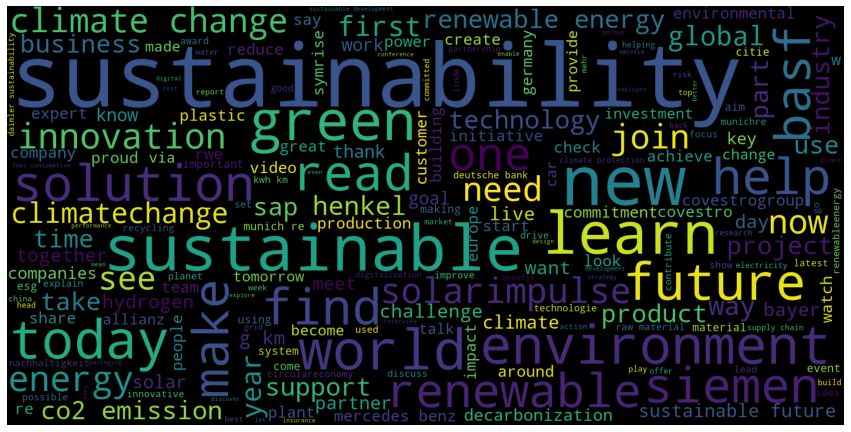

In [7]:
cloud_data = green #change to either green or data

cloud_data['Tweets_lower'] = cloud_data['Tweets'].astype(str)
cloud_data['Tweets_lower'] = [entry.lower() for entry in cloud_data['Tweets']]
text = ' '.join(cloud_data['Tweets_lower'])
stop_words = ["https", "co", "t", "amp","li","e","rt","s", "x","ly","bit","u", "us"] + list(STOPWORDS) + stopwords.words('german')
wordcloud = WordCloud(width=1600, height=800,stopwords = stop_words).generate(str(text))

plt.figure( figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

change df variable to either sustainable dataset (green) oder general (data) to see the most frequent words per company

IndexError: list index out of range

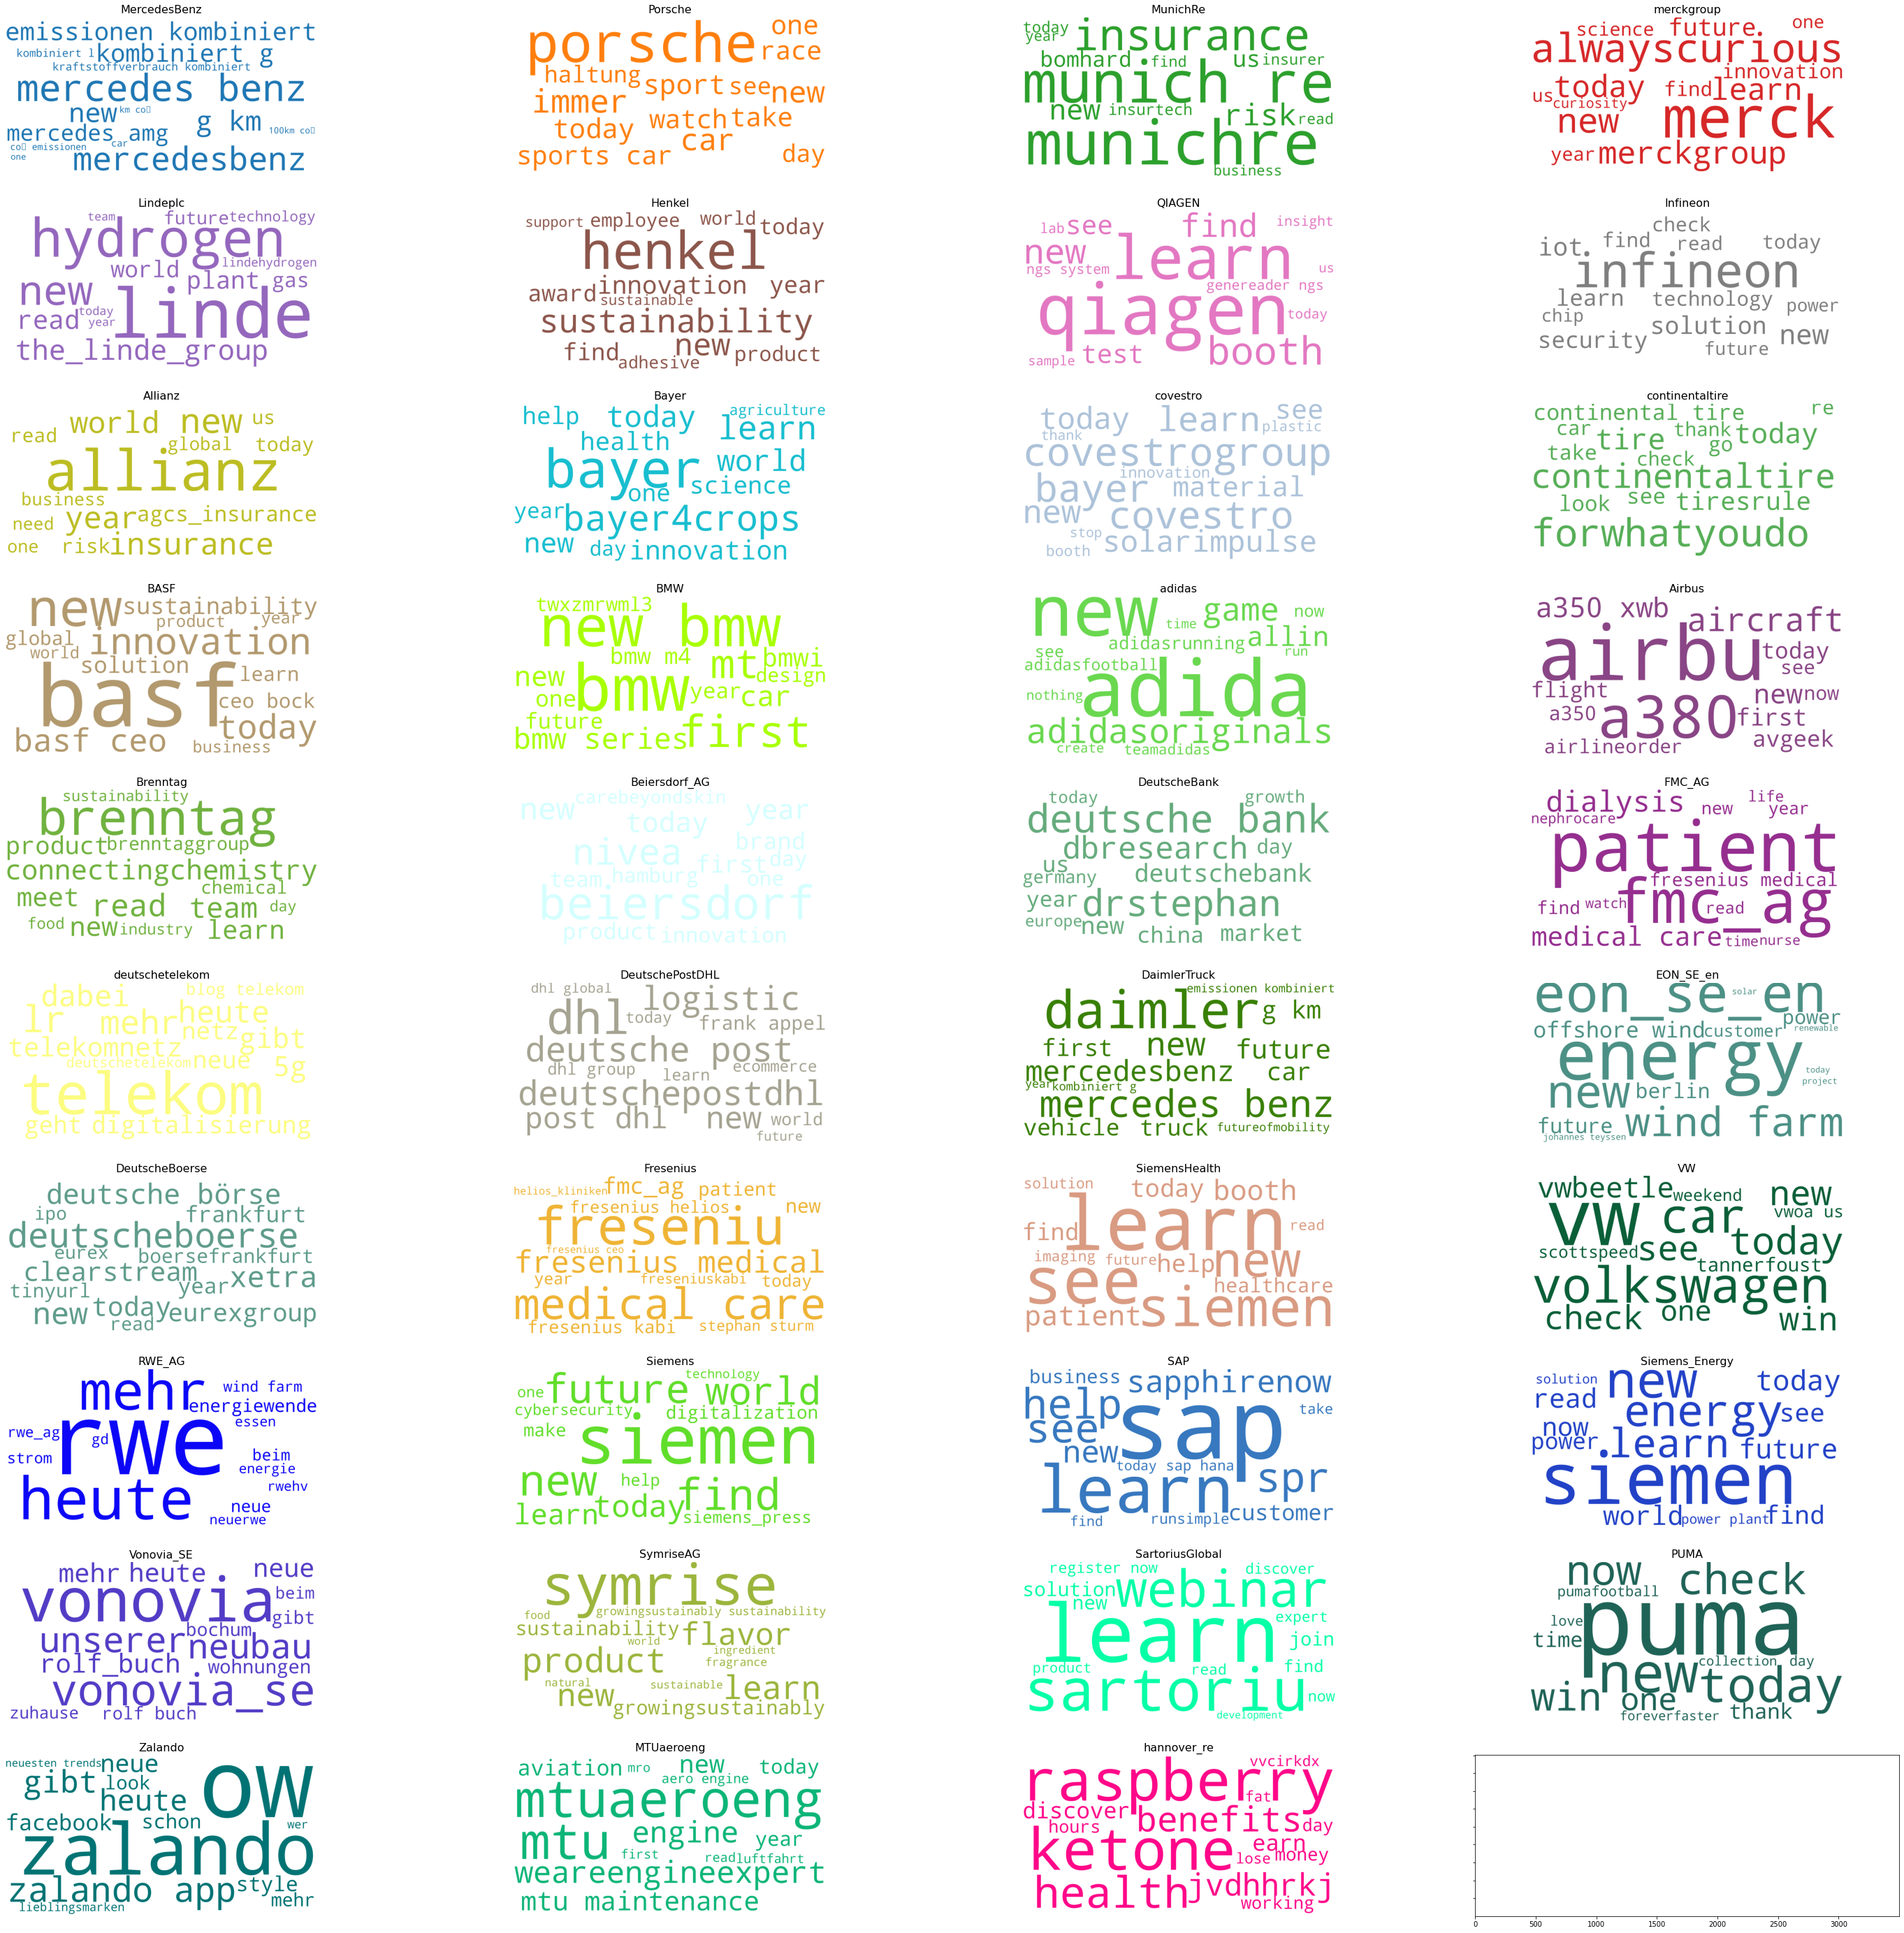

In [15]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

df = data #change to either green or data

stop_words = ["https", "co", "t", "amp","li","e","rt","s", "x","ly","bit","u", "us"] + list(STOPWORDS) + stopwords.words('german')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] + [color for name, color in mcolors.XKCD_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=1800,
                  max_words=14,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(10, 4, figsize=(50,50), sharex=True, sharey=True)
companies = df['author'].unique().tolist()
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    cloud_data = df
    cloud_data = cloud_data[cloud_data['author'] == companies[i]]
    cloud_data['Tweets_lower'] = cloud_data['Tweets'].astype(str)
    cloud_data['Tweets_lower'] = [entry.lower() for entry in cloud_data['Tweets']]
    text = ' '.join(cloud_data['Tweets_lower'])

    cloud.generate(str(text))
    plt.gca().imshow(cloud)
    plt.gca().set_title(str(companies[i]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.figure(figsize=(9, 3.5), dpi=1600)
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
'''plt.savefig("wordclouds", 
                          dpi=3600,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches=None, 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)'''